In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import LSTM, Dense, Dropout
from scipy.stats import skew, kurtosis, shapiro, probplot
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_excel("/content/DaTa.xlsx")
df.head(10)

,Date,Total
0,2017-01-31,1107968
1,2017-02-28,1023388
2,2017-03-31,1059777
3,2017-04-30,1171386
4,2017-05-31,1148588
5,2017-06-30,1144001
6,2017-07-31,1370591
7,2017-08-31,1393243
8,2017-09-30,1250231
9,2017-10-31,1161565


In [ ]:
df.shape

(89, 2)

In [ ]:
df.isna().sum()

,0
Date,0
Total,0


Outliers in Total:
Empty DataFrame
Columns: [Date, Total]
Index: []



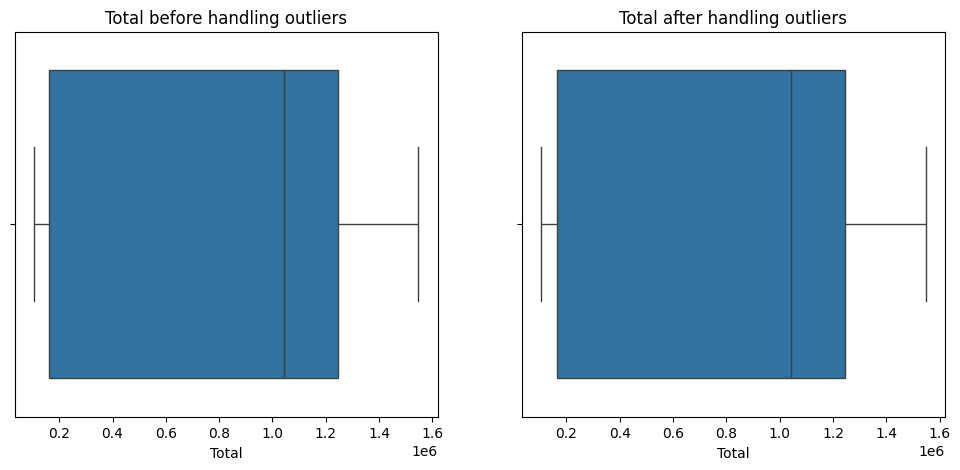

In [ ]:
columns_to_check = ['Total']
df =pd.DataFrame(df)
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return outliers

for column in columns_to_check:

    original_data = df[column].copy()

    outliers = handle_outliers(df, column)

    print(f'Outliers in {column}:')
    print(outliers)
    print()

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=original_data)
    plt.title(f'{column} before handling outliers')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f'{column} after handling outliers')

    plt.show()

In [ ]:
columns_to_analyze = ['Total']
for column in columns_to_analyze:
    # Convert column to numeric values, handling errors by coercing them to NaN
    df[column] = pd.to_numeric(df[column], errors='coerce')

    # Drop NaN values for accurate calculation
    column_data = df[column].dropna()

    # Calculate skewness
    skewness = skew(column_data)

    # Calculate kurtosis
    kurt = kurtosis(column_data)

    print(f'Column: {column}')
    print(f'Skewness: {skewness:.3f}')
    print(f'Kurtosis: {kurt:.3f}')
    print()

Column: Total
Skewness: -0.416
Kurtosis: -1.380



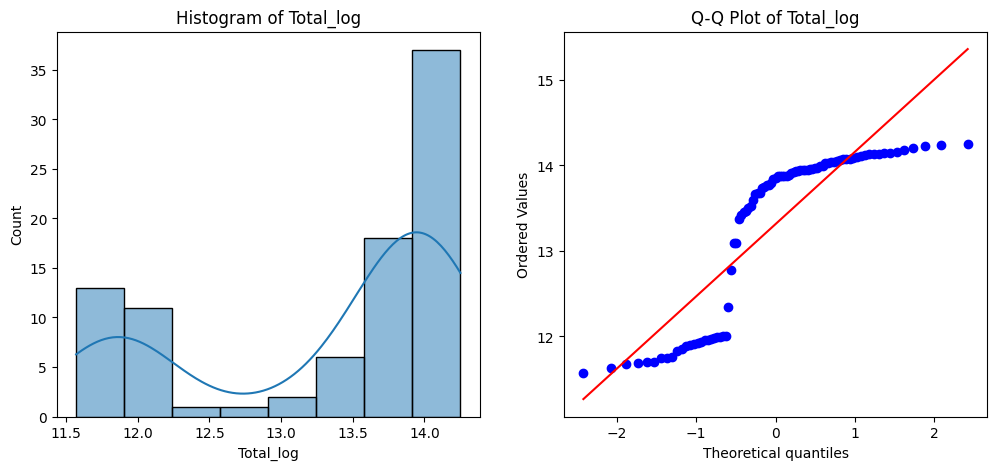

In [ ]:
columns_to_transform = ['Total']

def plot_distribution(df, column):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df, kde=True)
    plt.title(f'Histogram of {column}')

    plt.subplot(1, 2, 2)
    probplot(df, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')

    plt.show()

for column in columns_to_transform:

    df[column + '_log'] = np.log(df[column] + 1)

    transformed_data = df[column + '_log'].dropna()
    plot_distribution(transformed_data, column + '_log')


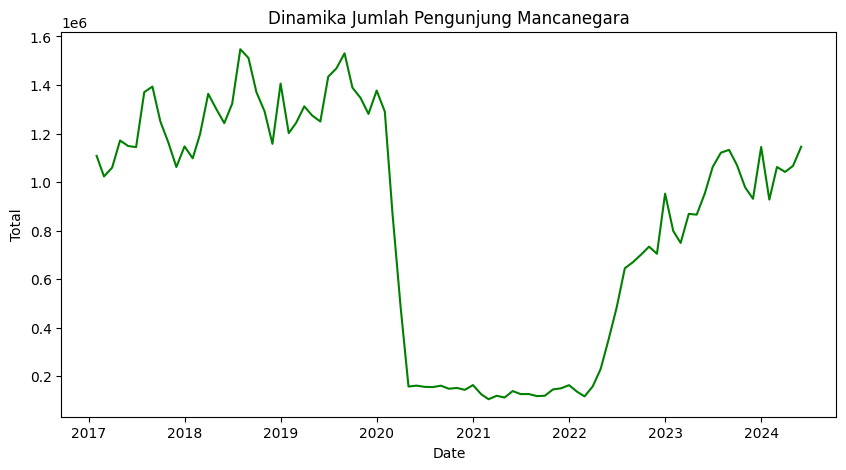

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Total'], color='green')
plt.title('Dinamika Jumlah Pengunjung Mancanegara')
plt.xlabel('Date')
plt.ylabel('Total')
plt.show()

In [ ]:
data = {
    'Date': df['Date'],
    'Total_log': df['Total_log']}

df_new = pd.DataFrame(data)

print(df_new.head())

        Date  Total_log
0 2017-01-31  13.918039
1 2017-02-28  13.838630
2 2017-03-31  13.873570
3 2017-04-30  13.973699
4 2017-05-31  13.954045


Columns to transform: ['target_scaled']
Train shape: (71, 2)
Test shape: (18, 2)
train_X shape: (65, 5, 2)
train_y shape: (65,)
test_X shape: (12, 5, 2)
test_y shape: (12,)
train_X shape after reshaping: (65, 5, 2)
test_X shape after reshaping: (12, 5, 2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/75
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1504
Epoch 2/75
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0741
Epoch 3/75
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0639
Epoch 4/75
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0449
Epoch 5/75
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0658
Epoch 6/75
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0257
Epoch 7/75
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0324
Epoch 8/75
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0318
Epoch 9/75
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0256
Epoch 10/75
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0295
Epoch 11/75
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0440
Epoch 12/75
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0338
Epoch 13/75
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0469
Epoch 14/75
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0221
Epoch 15/75
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0280
Epoch 16/75
65/65 ━

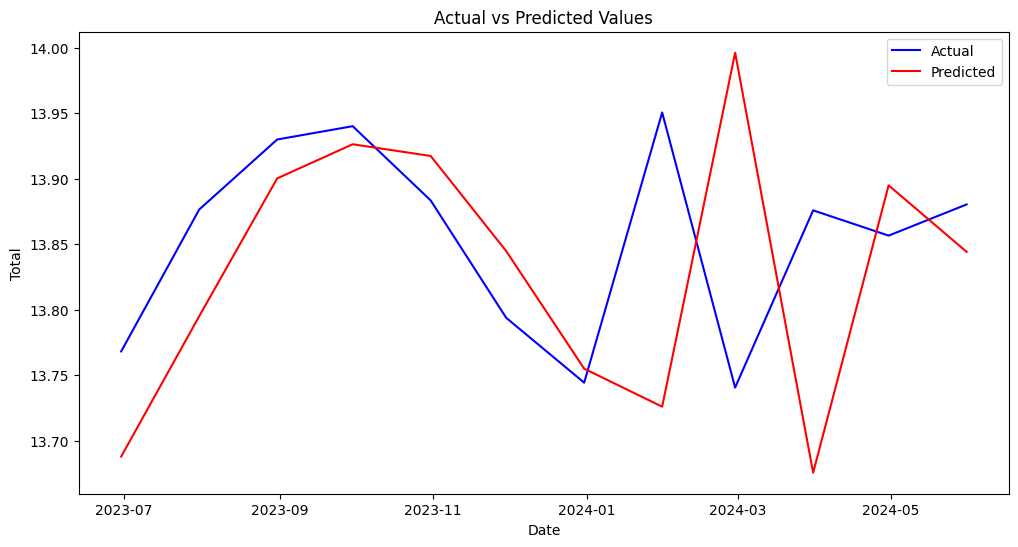

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


<ipython-input-10-5453a86150ac>:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[0, -1, 0] = prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


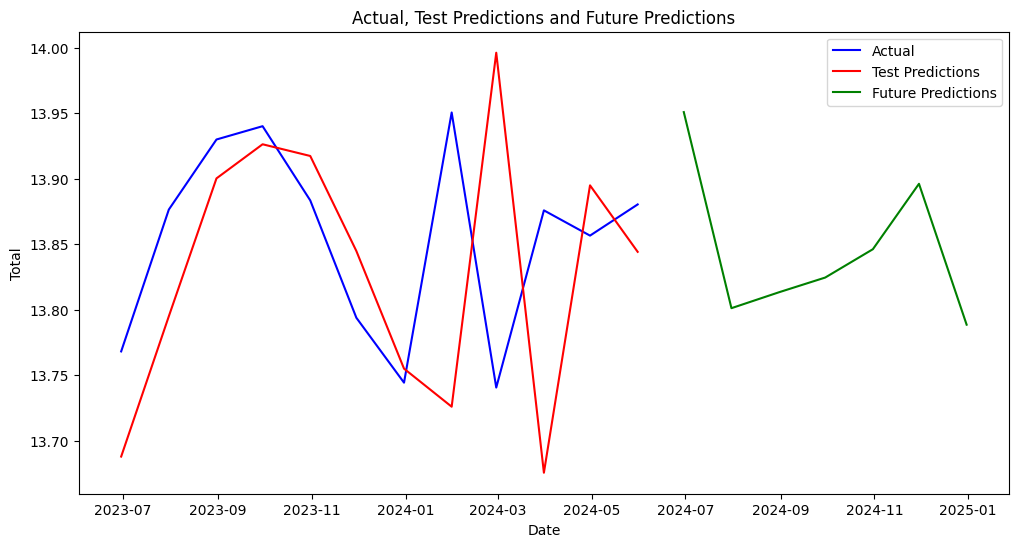

In [ ]:
target_column = 'Total_log'
# Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
df_new['target_scaled'] = scaler.fit_transform(df_new[[target_column]].astype('float32'))

# Combine scaled target with original features
columns_to_transform = df_new.columns.drop([target_column, 'Date']).tolist()

# Verify columns to transform
print('Columns to transform:', columns_to_transform)

df_combined = df_new[columns_to_transform + ['target_scaled']]

# Train-test split
train_size = int(len(df_combined) * 0.8)
train, test = df_combined.iloc[0:train_size], df_combined.iloc[train_size:len(df_combined)]

# Print shapes to debug
print('Train shape:', train.shape)
print('Test shape:', test.shape)

# Function to create dataset
def create_dataset(data, look_back=5):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), :]
        X.append(a)
        y.append(data[i + look_back, -1])
    return np.array(X), np.array(y)

    # Function to predict future values
def predict_future(model, last_data, future_steps=7):
    future_predictions = []
    current_input = last_data
    for _ in range(future_steps):
        prediction = model.predict(current_input)
        future_predictions.append(prediction[0, 0])
        # Prepare the input for the next prediction
        current_input = np.roll(current_input, -1, axis=1)
        current_input[0, -1, 0] = prediction
    return future_predictions

look_back = 5
train_X, train_y = create_dataset(train.values.astype('float32'), look_back)
test_X, test_y = create_dataset(test.values.astype('float32'), look_back)

# Check shapes after creating datasets
print('train_X shape:', train_X.shape)
print('train_y shape:', train_y.shape)
print('test_X shape:', test_X.shape)
print('test_y shape:', test_y.shape)

# Ensure there are enough samples for both train and test sets
if len(test_X) == 0 or len(test_y) == 0:
    print("Not enough data points in the test set after splitting. Consider reducing the look-back period or increasing the dataset size.")
else:
    # Ensure X_train and X_test have the expected number of dimensions
    train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], train_X.shape[2]))
    test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], test_X.shape[2]))

    # Check shapes after reshaping
    print('train_X shape after reshaping:', train_X.shape)
    print('test_X shape after reshaping:', test_X.shape)

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(look_back, train_X.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(25))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(train_X, train_y, batch_size=1, epochs=75)

    # Make predictions
    train_predict = model.predict(train_X)
    if len(test_X) > 0:
        test_predict = model.predict(test_X)

        # Inverse transform predictions and actual values for comparison
        train_predict = scaler.inverse_transform(np.concatenate((train_predict, np.zeros((train_predict.shape[0], train_X.shape[2]-1))), axis=1))[:, 0]
        test_predict = scaler.inverse_transform(np.concatenate((test_predict, np.zeros((test_predict.shape[0], test_X.shape[2]-1))), axis=1))[:, 0]
        train_y = scaler.inverse_transform(np.concatenate((train_y.reshape(-1, 1), np.zeros((train_y.shape[0], train_X.shape[2]-1))), axis=1))[:, 0]
        test_y = scaler.inverse_transform(np.concatenate((test_y.reshape(-1, 1), np.zeros((test_y.shape[0], test_X.shape[2]-1))), axis=1))[:, 0]

        # Flatten the arrays for metric calculations
        train_y = train_y.flatten()
        test_y = test_y.flatten()
        train_predict = train_predict.flatten()
        test_predict = test_predict.flatten()

        # Evaluate the model
        train_mape = mean_absolute_percentage_error(train_y, train_predict)
        test_mape = mean_absolute_percentage_error(test_y, test_predict)

        # Print results
        print(f'Train MAPE (sklearn): {train_mape:.2f}%')
        print(f'Test MAPE (sklearn): {test_mape:.2f}%')

        # Calculate MAPE manually for test predictions
        mape_test_manual = np.mean(np.abs((test_y - test_predict) / test_y)) * 100
        print(f'MAPE for Test Set : {mape_test_manual:.2f}%')

        #RMSE
        mse = mean_squared_error(test_y, test_predict)
        rmse = np.sqrt(mse)
        print(f'Root Mean Squared Error (RMSE): {rmse}')

        # Print some predictions and actual values for debugging
        print('Some train predictions vs actual values:')
        for i in range(min(10, len(train_predict))):
            print(f'Predicted: {train_predict[i]}, Actual: {train_y[i]}')

        print('Some test predictions vs actual values:')
        for i in range(min(10, len(test_predict))):
            print(f'Predicted: {test_predict[i]}, Actual: {test_y[i]}')

    # Convert date column to datetime format if it's not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Get the dates for the test set
    test_dates = df['Date'].iloc[train_size + look_back + 1:train_size + look_back + 1 + len(test_y)]

    # Plot the actual vs predicted values with dates on x-axis
    plt.figure(figsize=(12, 6))
    plt.plot(test_dates, test_y, label='Actual', color='blue')
    plt.plot(test_dates, test_predict, label='Predicted', color='red')
    plt.title('Actual vs Predicted Values')
    plt.xlabel('Date')
    plt.ylabel('Total')
    plt.legend()
    plt.show()


    # Make future predictions
    future_steps = 7
    last_data = test.values[-look_back:].reshape(1, look_back, -1)
    future_predictions = predict_future(model, last_data, future_steps)

    # Inverse transform future predictions
    future_predictions_array = np.array(future_predictions).reshape(-1, 1)
    future_predictions_inv = scaler.inverse_transform(
        np.concatenate(
            (future_predictions_array, np.zeros((future_steps, df_combined.shape[1] - 1))),
            axis=1
        )
    )[:, 0]

    # Generate future dates for plotting
    future_dates = pd.date_range(start=test_dates.iloc[-1], periods=future_steps + 1, freq='M')[1:]

    # Plot future predictions
    plt.figure(figsize=(12, 6))
    plt.plot(test_dates, test_y, label='Actual', color='blue')
    plt.plot(test_dates, test_predict, label='Test Predictions', color='red')
    plt.plot(future_dates, future_predictions_inv, label='Future Predictions', color='green')
    plt.title('Actual, Test Predictions and Future Predictions')
    plt.xlabel('Date')
    plt.ylabel('Total')
    plt.legend()
    plt.show()


         Date  Actual Total  Test Predicted Total  Future Predicted Total
0  2023-06-30     13.768120             13.551960                     NaN
1  2023-07-31     13.876410             13.660923                     NaN
2  2023-08-31     13.929901             13.758532                     NaN
3  2023-09-30     13.940061             13.782946                     NaN
4  2023-10-31     13.883399             13.774685                     NaN
5  2023-11-30     13.793797             13.704492                     NaN
6  2023-12-31     13.744259             13.618782                     NaN
7  2024-01-31     13.950516             13.591612                     NaN
8  2024-02-29     13.740515             13.853664                     NaN
9  2024-03-31     13.875806             13.536028                     NaN
10 2024-04-30     13.856520             13.761097                     NaN
11 2024-05-31     13.880324             13.699632                     NaN
12 2024-06-30           NaN           

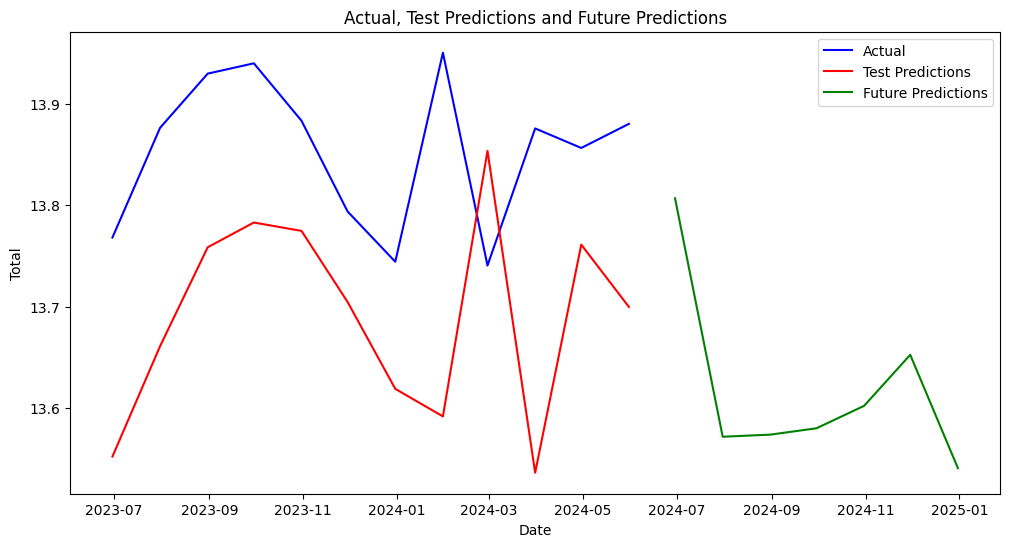

In [ ]:
import pandas as pd
import numpy as np

# Menggabungkan test_dates dan future_dates menggunakan pd.concat
all_dates = pd.concat([test_dates, pd.Series(future_dates)], ignore_index=True)

# Combine actual test values, test predictions, and future predictions into a single DataFrame
combined_df = pd.DataFrame({
    'Date': all_dates,
    'Actual Total': np.append(test_y, [np.nan] * future_steps),
    'Test Predicted Total': np.append(test_predict, [np.nan] * future_steps),
    'Future Predicted Total': np.append([np.nan] * len(test_y), future_predictions_inv)
})

# Display the DataFrame with combined results
print(combined_df)

# Plot actual, test predictions, and future predictions
plt.figure(figsize=(12, 6))
plt.plot(test_dates, test_y, label='Actual', color='blue')
plt.plot(test_dates, test_predict, label='Test Predictions', color='red')
plt.plot(future_dates, future_predictions_inv, label='Future Predictions', color='green')
plt.title('Actual, Test Predictions and Future Predictions')
plt.xlabel('Date')
plt.ylabel('Total')
plt.legend()
plt.show()


In [ ]:

comparison_df = pd.DataFrame({
    'Date': test_dates,
    'Actual Total': test_y,
    'Predicted Total': test_predict
})

# Menampilkan DataFrame sebagai tabel
print(comparison_df.head(10))  # Menampilkan 10 baris pertama dari tabel

# Jika Anda ingin menampilkan keseluruhan tabel, gunakan ini:
# print(comparison_df)


         Date  Actual Total  Predicted Total
77 2023-06-30     13.768120        13.687842
78 2023-07-31     13.876410        13.794946
79 2023-08-31     13.929901        13.900211
80 2023-09-30     13.940061        13.926258
81 2023-10-31     13.883399        13.917318
82 2023-11-30     13.793797        13.844761
83 2023-12-31     13.744259        13.754957
84 2024-01-31     13.950516        13.725900
85 2024-02-29     13.740515        13.996149
86 2024-03-31     13.875806        13.675502
